In [1]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [6]:
# -*- coding: utf-8 -*-
__author__ = 'Seran'
 
# 영상의 의미지를 연속적으로 캡쳐할 수 있게 하는 class
vidcap = cv2.VideoCapture('ACV.mp4')
 
count = 0
 
while(vidcap.isOpened()):
    ret, image = vidcap.read()
 
    if(int(vidcap.get(1)) % 50 == 0):
        print('Saved frame number : ' + str(int(vidcap.get(1))))
        cv2.imwrite("../images/frame%d.jpg" % count, image)
        print('Saved frame%d.jpg' % count)
        count += 1
        
vidcap.release()

Saved frame number : 50
Saved frame0.jpg
Saved frame number : 100
Saved frame1.jpg
Saved frame number : 150
Saved frame2.jpg
Saved frame number : 200
Saved frame3.jpg
Saved frame number : 250
Saved frame4.jpg
Saved frame number : 300
Saved frame5.jpg
Saved frame number : 350
Saved frame6.jpg
Saved frame number : 400
Saved frame7.jpg
Saved frame number : 450
Saved frame8.jpg
Saved frame number : 500
Saved frame9.jpg
Saved frame number : 550
Saved frame10.jpg
Saved frame number : 600
Saved frame11.jpg
Saved frame number : 650
Saved frame12.jpg
Saved frame number : 700
Saved frame13.jpg
Saved frame number : 750
Saved frame14.jpg
Saved frame number : 800
Saved frame15.jpg
Saved frame number : 850
Saved frame16.jpg
Saved frame number : 900
Saved frame17.jpg
Saved frame number : 950
Saved frame18.jpg
Saved frame number : 1000
Saved frame19.jpg
Saved frame number : 1050
Saved frame20.jpg
Saved frame number : 1100
Saved frame21.jpg
Saved frame number : 1150
Saved frame22.jpg
Saved frame number

KeyboardInterrupt: 

In [7]:
print(image.shape)

(720, 1280, 3)


In [8]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [9]:
image = image.reshape((image.shape[0] * image.shape[1], 3)) # height, width 통합
print(image.shape)
# (25024, 3)

(921600, 3)


In [10]:
k = 5 # 예제는 5개로 나누겠습니다
clt = KMeans(n_clusters = k)
clt.fit(image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [14]:
for center in clt.cluster_centers_:
    print(center)

[22.00388513 27.74632461 45.00186745]
[141.24095714 150.28253138 161.29026382]
[44.70906675 52.29397569 71.35055191]
[86.0293385  95.49776902 93.43343875]
[168.18896436 197.06343838 234.57676647]


In [15]:
def centroid_histogram(clt):
    # grab the number of different clusters and create a histogram
    # based on the number of pixels assigned to each cluster
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)

    # normalize the histogram, such that it sums to one
    hist = hist.astype("float")
    hist /= hist.sum()

    # return the histogram
    return hist


hist = centroid_histogram(clt)
print(hist)

[0.46925673 0.08760525 0.23104926 0.10040582 0.11168294]


0.4692567274305556 [22.00388513 27.74632461 45.00186745]
0.08760525173611111 [141.24095714 150.28253138 161.29026382]
0.23104926215277777 [44.70906675 52.29397569 71.35055191]
0.10040581597222223 [86.0293385  95.49776902 93.43343875]
0.11168294270833333 [168.18896436 197.06343838 234.57676647]


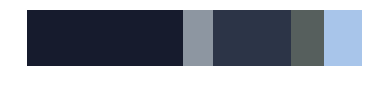

In [17]:
def plot_colors(hist, centroids):
    # initialize the bar chart representing the relative frequency
    # of each of the colors
    bar = np.zeros((50, 300, 3), dtype="uint8")
    startX = 0

    # loop over the percentage of each cluster and the color of
    # each cluster
    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
                      color.astype("uint8").tolist(), -1)
        startX = endX
        print(percent, color)
    # return the bar chart
    return bar

bar = plot_colors(hist, clt.cluster_centers_)


# show our color bart
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()
